In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Linear Regression

## Generating data with constant variance

In [2]:
## Generate some data with constant variance /noise 
x = np.arange(100).reshape(100,1) 
intercept_ = 6 
slope_ = 0.1 

## non constant error 
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1) 

## Regression equation 
y = intercept_ + slope_ * x + error_  

## Scatter Plot

Text(0.5, 1.0, 'Data with constant variance')

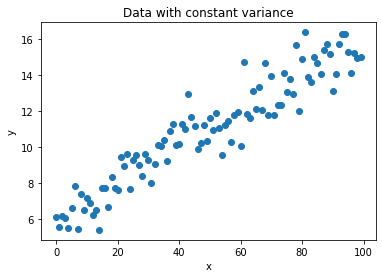

In [3]:
plt.figure(1) 
plt.scatter(x, y) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Data with constant variance")

## Perform Linear Regression on this data

In [4]:
## Let us do a least square regression on the above dataset 
from sklearn.linear_model import LinearRegression  
model1 = LinearRegression(fit_intercept = True, normalize = False) 
model1.fit(x, y)  
y_pred1 = model1.predict(x)  
print("Mean squared error: {0:.2f}"       .format(np.mean((y_pred1 - y) ** 2))) 
print('Variance score: {0:.2f}'.format(model1.score(x, y)))  

Mean squared error: 0.94
Variance score: 0.90


## Scatter Plot

Text(0.5, 1.0, 'Linear regression')

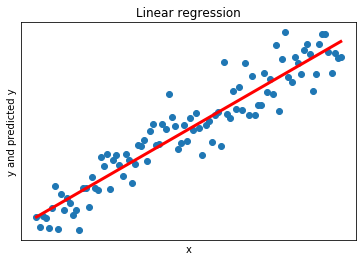

In [7]:
## Plot the regression 
plt.figure(2) 
plt.scatter(x, y) 
plt.plot(x, y_pred1, color='red',          linewidth=3)  
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Linear regression")

# Quantile Regression

## Generate data with noise

In [9]:
## Generate some data with non-constant variance 
x_ = np.arange(100).reshape(100,1) 
intercept_ = 6 
slope_ = 0.1 

## Non constant variance 
var_ = 0.1 + 0.05 * x_ 

## non constant error 
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_) 

## Regression equation 
y_ = intercept_ + slope_ * x + error_ 

## Scatter plot

Text(0.5, 1.0, 'Data with non-constant variance')

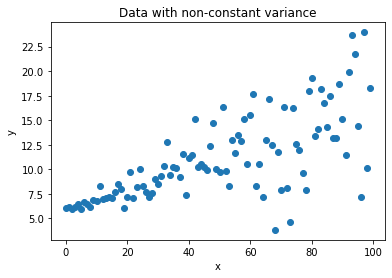

In [10]:
plt.figure(3) 
plt.scatter(x_, y_) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Data with non-constant variance")

## Fit the model with normal Linear Regression

In [11]:
model2 = LinearRegression(fit_intercept = True, normalize = False) 
model2.fit(x_, y_)  
y_pred2 = model2.predict(x_)  
print("Mean squared error: {0:.2f}"       .format(np.mean((y_pred2 - y_) ** 2))) 
print('Variance score: {0:.2f}'.format(model2.score(x_, y_)))  

Mean squared error: 9.58
Variance score: 0.48


## Scatter plot

Text(0.5, 1.0, 'Data with non-constant variance')

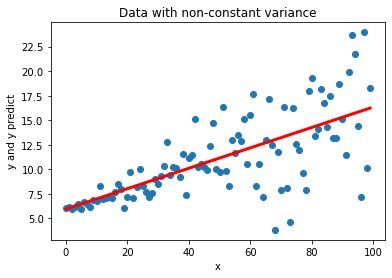

In [12]:
plt.figure(3) 
plt.scatter(x_, y_) 
plt.plot(x_, y_pred2, color='red',          linewidth=3)  
plt.xlabel("x") 
plt.ylabel("y and y predict") 
plt.title("Data with non-constant variance")

## Fit the model with Quantile Regression

In [13]:
## Quantile regression for the median, 0.5th quantile 
import pandas as pd  
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"]) 
print(data.head())  

import statsmodels.formula.api as smf   
mod = smf.quantreg('y ~ x', data) 
res = mod.fit(q=.5) 
print(res.summary())


     x         y
0  0.0  6.048831
1  1.0  6.203449
2  2.0  5.944548
3  3.0  6.126444
4  4.0  6.445908
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3749
Model:                       QuantReg   Bandwidth:                       2.272
Method:                 Least Squares   Sparsity:                        5.574
Date:                Fri, 29 Oct 2021   No. Observations:                  100
Time:                        15:11:43   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8198      0.553     10.519      0.000       4.722       6.918
x              0.1022      0.010     10.588      0.000       0.083       0.121


In [37]:
## Build the model for other quantiles 
quantiles = np.arange(0.05,1,0.05) 
print(quantiles)
models = [] 
params = []  
for qt in quantiles:  
    print(qt)  
    res = mod.fit(q = qt )    
    models.append(res)    
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())   
    params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])  
    print(params)


[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]
0.05
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.1
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.15000000000000002
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.2
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.25
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.3
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.35000000000000003
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0

C:\Users\Tuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.



0.45
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.5
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.55


C:\Users\Tuan\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.6000000000000001
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.6500000000000001
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.7000000000000001
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.7500000000000001
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.8
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.8500000000000001
     qt  intercept   x_coef  cf_lower_bound  cf_upper_bound
0  0.05   5.918429  0.01306       -0.017506        0.043626
0.9000000000000001
     qt  intercept   x_coef  cf_lower_boun

## Scatter plot

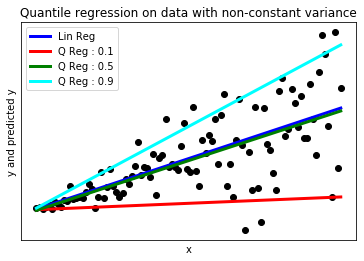

In [41]:
plt.figure(5) 
plt.scatter(x_, y_,  color='black') 

plt.plot(x_, y_pred2, color='blue',          linewidth=3, label='Lin Reg')  

y_pred3 = models[1].params['Intercept'] + models[0].params['x'] * x_ 
plt.plot(x_, y_pred3, color='red',          linewidth=3, label='Q Reg : 0.1') 

y_pred4 = models[9].params['Intercept'] + models[9].params['x'] * x_ 
plt.plot(x_, y_pred4, color='green',          linewidth=3, label='Q Reg : 0.5')   

y_pred5 = models[17].params['Intercept'] + models[17].params['x'] * x_ 
plt.plot(x_, y_pred5, color='cyan',          linewidth=3, label='Q Reg : 0.9')   

plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Quantile regression on data with non-constant variance") 
plt.legend()


Text(0, 0.5, 'Regression Coefficients')

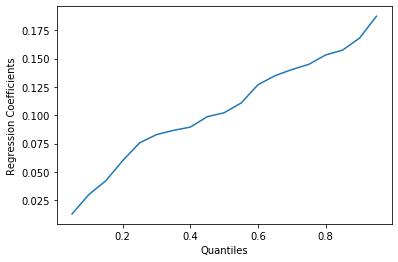

In [43]:
## Plot the changes in the quantile coefficients 
plt.figure(6) 
x_plot = [0.05*i for i in range(1,20)]
y1 = [models[i].params['x'] for i in range(len(models))]

#y2 = [models[i].params['cf_lower_bound'] for i in range(10)]
#y3 = [models[i].params['cf_upper_bound'] for i in range(10)]

plt.plot(x_plot, y1)
plt.xlabel('Quantiles')
plt.ylabel('Regression Coefficients')
#params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'],          title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])


In [46]:
params

,qt,intercept,x_coef,cf_lower_bound,cf_upper_bound
0,0.05,5.918429,0.01306,-0.017506,0.043626


In [24]:
qt

0.9

In [32]:
len(models)

9